# PJM Data Analysis
By Fiona Dean

Kaggle has kindly hosted a large data set including 20 years worth of electrical consumption from the PJM company. The data is presented by Business Unit and has a list of hourly consumption for the timeperiod the Business Unite existed. Since electrical consumption often correlates to temperature and working days, we can find further data sets as follows.

The PJM Data set can be downloaded here: 
    https://www.kaggle.com/robikscube/hourly-energy-consumption
The Daily Temperature of major cities can be downloaded here: 
    https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities
The major US holidays I have compiled from two sources: 
    https://www.public-holidays.us/mobile_US_KF_1998_Federal%20holidays and https://www.timeanddate.com/holidays/us/
To read more about the company, please follow the link: 
    https://www.pjm.com/

# Steps to be completed during Analysis:

1. View descriptive statistics
    Compare electricity usage on workdays vs holidays. View how holiday weekends affect electrical use. View how temperature and electricical consumption correlate.
    
2. Create a model for predicting electrical consumption and compare it to real data.


To set up the environment, we need to import the following libraries. We will also wish to include the datetime library with timedelta, so that we can quickly and accurately assess any cleansing issues in the data. Then, we can open the CSV Files with the cleansed data as a Pandas dataframe.

In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta
import seaborn as sns
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
mpl.rcParams['figure.figsize'] = (20,5)

combo = pd.read_csv('combo.csv')
rolling = pd.read_csv('rolling.csv')
combo_temp = pd.read_csv('combo_temp.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Descriptive Statistics

In [2]:
combo_columns = combo.columns.values.tolist()
combo_columns = combo_columns[1:]
combo = combo.filter(items=combo_columns)
combo.head()

,Datetime,AEP_MW,COMED_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,NI_MW,PJM_Load_MW,PJME_MW,PJMW_MW,Row_Total,Holiday,Holiday_Variable,Weekday,Weekday_num,Long Weekend
0,1998-04-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22259.0,NaN,NaN,22259.0,Not Holiday,0,Wednesday,2,False
1,1998-04-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21244.0,NaN,NaN,21244.0,Not Holiday,0,Wednesday,2,False
2,1998-04-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20651.0,NaN,NaN,20651.0,Not Holiday,0,Wednesday,2,False
3,1998-04-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20421.0,NaN,NaN,20421.0,Not Holiday,0,Wednesday,2,False
4,1998-04-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20713.0,NaN,NaN,20713.0,Not Holiday,0,Wednesday,2,False


In [3]:
rolling_columns = rolling.columns.values.tolist()
rolling_columns = rolling_columns[1:]
rolling = rolling.filter(items=rolling_columns)
rolling.head()

,Datetime,Holiday,Holiday_Variable,Weekday,Weekday_num,Long Weekend,AEP_roll,COMED_roll,DAYTON_roll,DEOK_roll,DOM_roll,DUQ_roll,EKPC_roll,FE_roll,NI_roll,PJM_Load_roll,PJME_roll,PJMW_roll,Row_Totroll
0,1998-04-01 01:00:00,Not Holiday,0,Wednesday,2,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998-04-01 02:00:00,Not Holiday,0,Wednesday,2,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,717.713383,NaN,NaN,717.713383
2,1998-04-01 03:00:00,Not Holiday,0,Wednesday,2,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,813.176693,NaN,NaN,813.176693
3,1998-04-01 04:00:00,Not Holiday,0,Wednesday,2,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,820.366331,NaN,NaN,820.366331
4,1998-04-01 05:00:00,Not Holiday,0,Wednesday,2,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,736.111269,NaN,NaN,736.111269


In [4]:
combo_temp.head()

,Datetime,AEP_MW,COMED_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,NI_MW,PJM_Load_MW,PJME_MW,PJMW_MW,Row_Total,Holiday,Holiday_Variable,Weekday,Weekday_num,Long Weekend,AvgTemperature
0,1998-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.689677
1,1998-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.689677
2,1998-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.689677
3,1998-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.689677
4,1998-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.689677


In [5]:
combo.describe()

,AEP_MW,COMED_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,NI_MW,PJM_Load_MW,PJME_MW,PJMW_MW,Row_Total,Holiday_Variable,Weekday_num
count,121296.000000,66504.000000,121296.000000,57744.000000,116208.000000,119088.000000,45336.000000,62880.000000,58464.000000,32904.000000,145392.000000,143232.000000,178296.000000,178344.000000,178344.000000
mean,15499.150331,11419.962671,2037.770495,3105.063115,10948.863021,1658.771320,1464.232332,7792.047678,11701.084257,29764.228635,32078.927654,5602.214393,68549.222243,0.028260,2.999069
std,2591.379068,2304.083241,393.425109,599.822965,2413.989102,301.741752,378.852685,1331.252757,2371.594501,5850.797163,6464.283311,979.177780,28066.835095,0.165715,2.000106
min,9581.000000,7237.000000,982.000000,907.000000,1253.000000,1014.000000,514.000000,0.000000,7003.000000,17461.000000,14544.000000,487.000000,17461.000000,0.000000,0.000000
25%,13629.000000,9780.000000,1749.000000,2687.000000,9322.000000,1444.000000,1185.000000,6806.750000,9953.000000,25471.000000,27571.000000,4906.000000,39045.750000,0.000000,1.000000
50%,15309.000000,11151.000000,2009.000000,3013.000000,10501.000000,1630.000000,1386.000000,7700.000000,11520.000000,29653.000000,31420.000000,5530.000000,73851.500000,0.000000,3.000000
75%,17200.000000,12510.000000,2279.000000,3449.000000,12378.000000,1819.000000,1699.000000,8556.000000,12896.000000,33071.250000,35647.000000,6252.000000,88485.000000,0.000000,5.000000
max,25695.000000,23753.000000,3746.000000,5445.000000,21651.000000,3054.000000,3490.000000,14032.000000,23631.000000,54030.000000,62009.000000,9594.000000,158071.000000,1.000000,6.000000


In [6]:
rolling.describe()

,Holiday_Variable,Weekday_num,AEP_roll,COMED_roll,DAYTON_roll,DEOK_roll,DOM_roll,DUQ_roll,EKPC_roll,FE_roll,NI_roll,PJM_Load_roll,PJME_roll,PJMW_roll,Row_Totroll
count,178344.000000,178344.000000,121343.000000,66551.000000,121343.000000,57791.000000,116255.000000,119135.000000,45383.000000,62927.000000,125015.000000,178343.000000,145439.000000,143279.000000,178343.000000
mean,0.028260,2.999069,2535.297469,2327.713037,393.466535,584.830914,2377.805162,297.255463,379.888871,1384.507913,2374.289677,5840.197039,6379.917282,939.940376,18999.994624
std,0.165715,2.000106,142.859854,251.029060,21.891957,54.436146,132.198598,18.982838,32.979072,101.193366,99.706156,218.202160,407.459091,48.663357,9418.348650
min,0.000000,0.000000,313.955411,253.144228,60.104076,48.083261,262.273394,61.281590,48.083261,1314.947451,444.063059,717.713383,797.616449,31.605643,717.713383
25%,0.000000,1.000000,2554.480518,2305.054468,395.213670,588.012517,2358.083026,296.586067,377.182994,1335.496242,2371.594501,5850.797163,6408.982801,922.794220,6971.702419
50%,0.000000,3.000000,2577.623894,2336.795379,398.814315,594.710062,2380.508891,299.330988,385.140274,1349.784604,2371.594501,5850.797163,6456.422905,954.185186,24616.345271
75%,0.000000,5.000000,2590.717637,2432.904781,401.355645,600.147367,2401.042826,301.917549,394.781526,1381.440307,2385.910507,5850.797163,6487.380803,967.307580,27257.941964
max,1.000000,6.000000,2610.361772,2681.938190,413.590215,674.021689,2931.431309,344.036563,438.077019,6044.348766,2613.250953,6627.351192,7271.495008,1008.339706,28210.726632


In [7]:
combo_temp.describe()

,AEP_MW,COMED_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,NI_MW,PJM_Load_MW,PJME_MW,PJMW_MW,Row_Total,Holiday_Variable,Weekday_num,AvgTemperature
count,121296.000000,66504.000000,121296.000000,57744.000000,116208.000000,119088.000000,45336.000000,62880.000000,58464.000000,32904.000000,145392.000000,143232.000000,178296.000000,178344.000000,178344.000000,196056.000000
mean,15499.150331,11419.962671,2037.770495,3105.063115,10948.863021,1658.771320,1464.232332,7792.047678,11701.084257,29764.228635,32078.927654,5602.214393,68549.222243,0.028260,2.999069,56.964361
std,2591.379068,2304.083241,393.425109,599.822965,2413.989102,301.741752,378.852685,1331.252757,2371.594501,5850.797163,6464.283311,979.177780,28066.835095,0.165715,2.000106,15.269579
min,9581.000000,7237.000000,982.000000,907.000000,1253.000000,1014.000000,514.000000,0.000000,7003.000000,17461.000000,14544.000000,487.000000,17461.000000,0.000000,0.000000,16.366443
25%,13629.000000,9780.000000,1749.000000,2687.000000,9322.000000,1444.000000,1185.000000,6806.750000,9953.000000,25471.000000,27571.000000,4906.000000,39045.750000,0.000000,1.000000,43.793960
50%,15309.000000,11151.000000,2009.000000,3013.000000,10501.000000,1630.000000,1386.000000,7700.000000,11520.000000,29653.000000,31420.000000,5530.000000,73851.500000,0.000000,3.000000,57.652258
75%,17200.000000,12510.000000,2279.000000,3449.000000,12378.000000,1819.000000,1699.000000,8556.000000,12896.000000,33071.250000,35647.000000,6252.000000,88485.000000,0.000000,5.000000,71.639355
max,25695.000000,23753.000000,3746.000000,5445.000000,21651.000000,3054.000000,3490.000000,14032.000000,23631.000000,54030.000000,62009.000000,9594.000000,158071.000000,1.000000,6.000000,82.868456


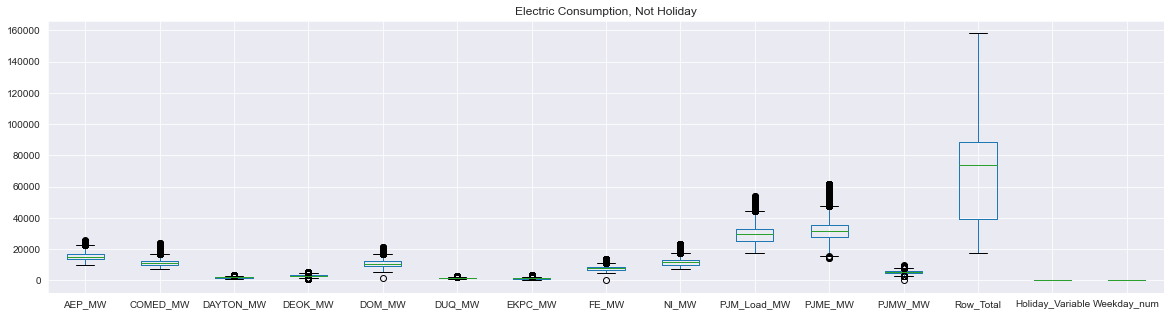

,AEP_MW,COMED_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,NI_MW,PJM_Load_MW,PJME_MW,PJMW_MW,Row_Total,Holiday_Variable,Weekday_num
count,118008.000000,64945.000000,118008.000000,56401.000000,113160.000000,115945.000000,44376.000000,61416.000000,56639.00000,31847.000000,141457.000000,139368.000000,173304.000000,173304.0,173304.000000
mean,15507.074050,11425.890623,2040.144753,3105.500390,10949.347225,1659.951572,1462.914255,7798.399554,11724.62261,29800.059064,32100.808186,5604.563322,68656.062082,0.0,3.044188
std,2588.572877,2306.737112,393.471243,599.801247,2414.177721,302.334371,377.145215,1329.644744,2381.53740,5866.401176,6479.103247,976.877527,28073.347080,0.0,1.982861
min,9581.000000,7237.000000,982.000000,907.000000,1253.000000,1014.000000,514.000000,0.000000,7003.00000,17461.000000,14544.000000,487.000000,17461.000000,0.0,0.000000
25%,13638.000000,9784.000000,1752.000000,2688.000000,9323.750000,1445.000000,1185.000000,6814.000000,9972.00000,25490.000000,27585.000000,4910.000000,39176.000000,0.0,1.000000
50%,15317.000000,11153.000000,2010.000000,3013.000000,10501.500000,1631.000000,1385.000000,7703.000000,11542.00000,29681.000000,31434.000000,5532.000000,73991.500000,0.0,3.000000
75%,17208.000000,12513.000000,2280.000000,3449.000000,12379.000000,1820.000000,1699.000000,8560.000000,12917.00000,33127.000000,35673.000000,6254.000000,88571.250000,0.0,5.000000
max,25695.000000,23753.000000,3746.000000,5445.000000,21651.000000,3054.000000,3490.000000,14032.000000,23631.00000,54030.000000,62009.000000,9594.000000,158071.000000,0.0,6.000000


In [8]:
not_holiday = combo['Holiday_Variable'] == 0
combo[not_holiday].plot(kind='box', title = 'Electric Consumption, Not Holiday')
plt.show()
combo[not_holiday].describe()

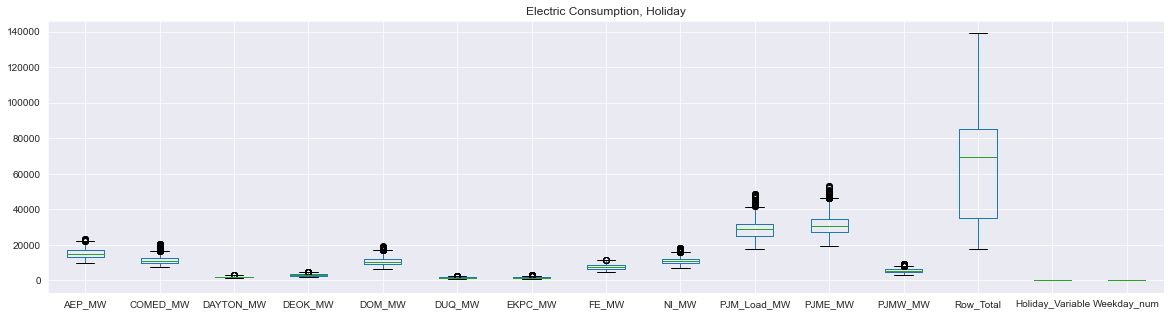

,AEP_MW,COMED_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,NI_MW,PJM_Load_MW,PJME_MW,PJMW_MW,Row_Total,Holiday_Variable,Weekday_num
count,3288.000000,1559.000000,3288.000000,1343.000000,3048.000000,3143.000000,960.000000,1464.000000,1825.000000,1057.000000,3935.000000,3864.000000,4992.000000,5040.0,5040.000000
mean,15214.763990,11173.015394,1952.557178,3086.699181,10930.886483,1615.231944,1525.160417,7525.581284,10970.569863,28684.671712,31292.357306,5517.492495,64840.133413,1.0,1.447619
std,2675.068338,2177.073794,382.179528,600.670551,2407.302025,275.534361,446.780320,1371.246067,1899.711268,5248.350120,5853.561455,1055.455385,27587.214431,0.0,1.971325
min,9701.000000,7394.000000,1154.000000,1957.000000,6253.000000,1059.000000,773.000000,4977.000000,7064.000000,17879.000000,19414.000000,3286.000000,17879.000000,1.0,0.000000
25%,13349.750000,9582.500000,1658.000000,2660.000000,9276.000000,1415.000000,1217.000000,6428.250000,9538.000000,25058.000000,27086.500000,4764.000000,35136.250000,1.0,0.000000
50%,15021.000000,11023.000000,1932.000000,3020.000000,10485.000000,1586.000000,1424.000000,7485.000000,10820.000000,28765.000000,30834.000000,5439.000000,69479.000000,1.0,0.000000
75%,16911.250000,12377.500000,2210.250000,3427.500000,12337.500000,1778.000000,1773.250000,8455.250000,12154.000000,31714.000000,34770.000000,6190.000000,85340.750000,1.0,3.000000
max,23381.000000,20784.000000,3154.000000,4910.000000,19177.000000,2667.000000,2883.000000,11723.000000,18416.000000,48697.000000,53396.000000,9187.000000,139040.000000,1.0,6.000000


In [9]:
is_holiday = combo['Holiday_Variable'] == 1
combo[is_holiday].plot(kind='box', title = 'Electric Consumption, Holiday')
plt.show()
combo[is_holiday].describe()

We can see that overall the average amount of electricity consumed is higher on non-holidays.

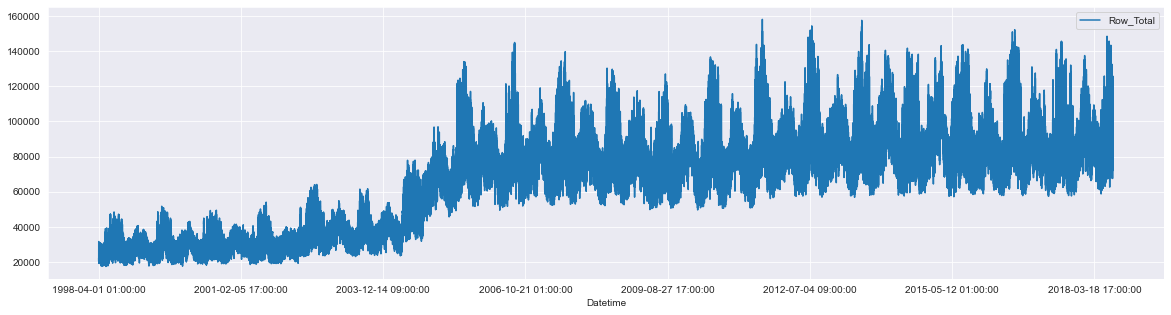

In [10]:
combo.plot(kind='line', x = "Datetime", y = 'Row_Total')
plt.show()

Looking at the above timeseries graph of the total electrical consumption, we see a large spike right after 2004. We can further look into why this occurred by doing a breakdown of each column over time.

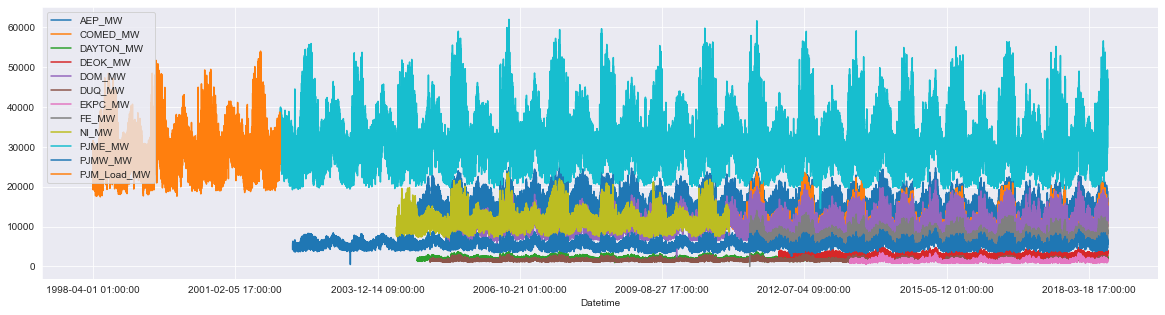

In [11]:
combo.plot(kind='line', x = "Datetime", y = ['AEP_MW', 'COMED_MW', 'DAYTON_MW', 'DEOK_MW', 
                                             'DOM_MW', 'DUQ_MW', 'EKPC_MW', 'FE_MW', 'NI_MW', 'PJME_MW', 'PJMW_MW', 'PJM_Load_MW' ])
plt.show()

In the above graph you can see that PJM began with only one business unit and then diversified by splitting into PJME and PJMW and adding the other business units. This accounts for the spike in 2004. Before we continue, lets make the datetime the index for each dataframe.

In [12]:
combo = combo.set_index('Datetime')
rolling = rolling.set_index('Datetime')
combo_temp = combo_temp.set_index('Datetime')

We can take a look at a three year section of data. This tells us that the consumption of electricity is very much affected by season.

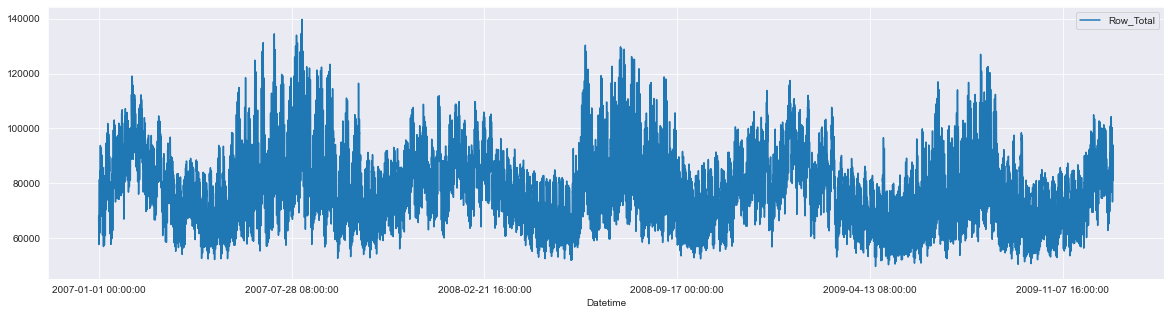

In [13]:
three_years = combo.loc['2007-01-01':'2010-01-01']
three_years.plot(kind='line', y = 'Row_Total')
plt.show()

We can see this seasonal trend across all business units of PJM.

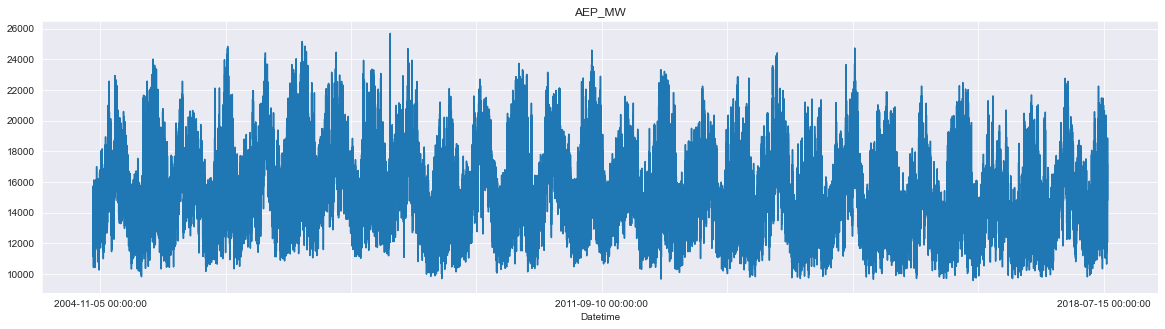

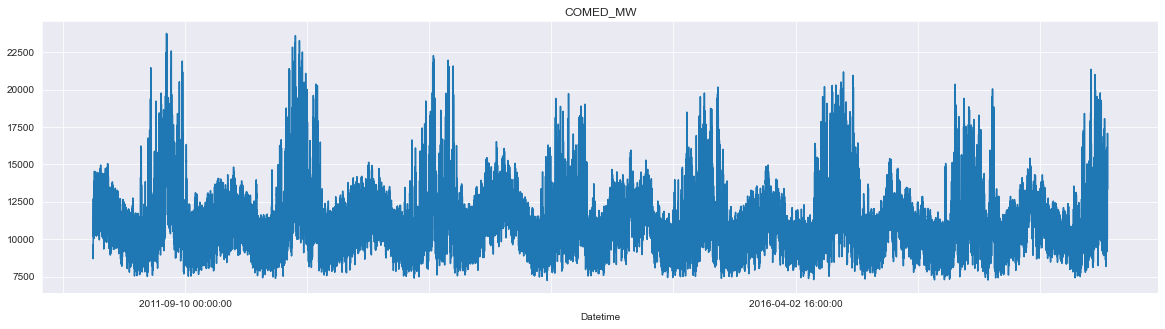

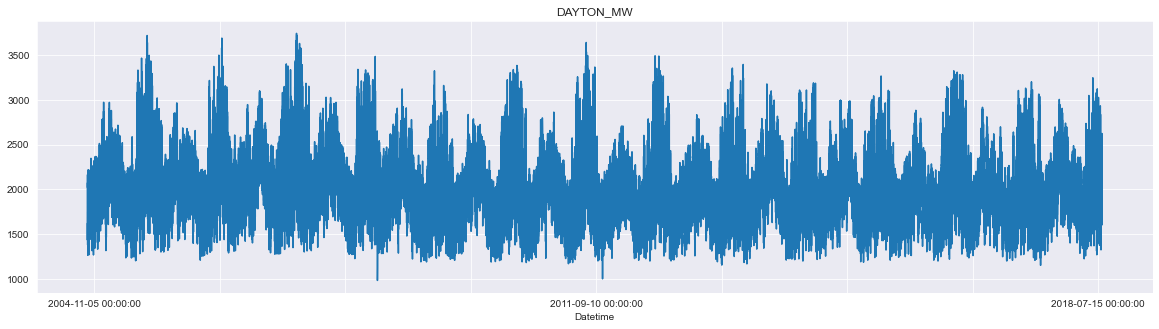

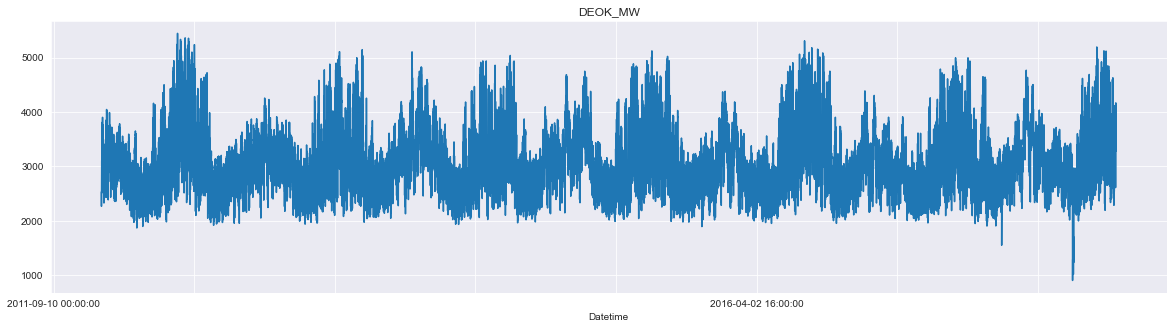

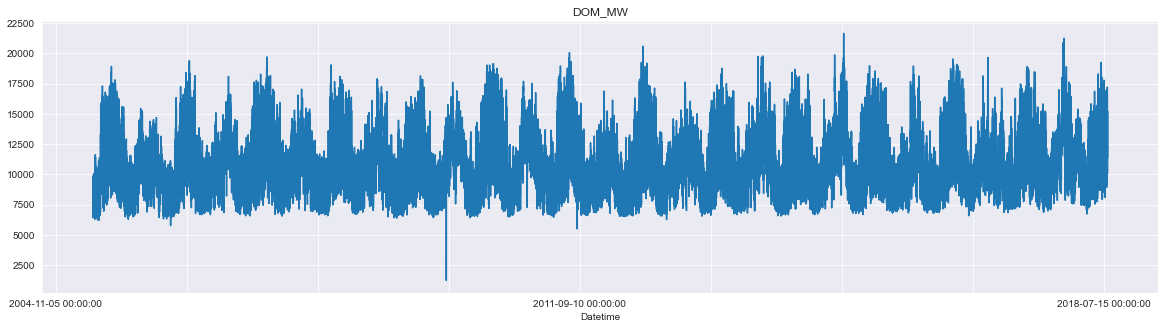

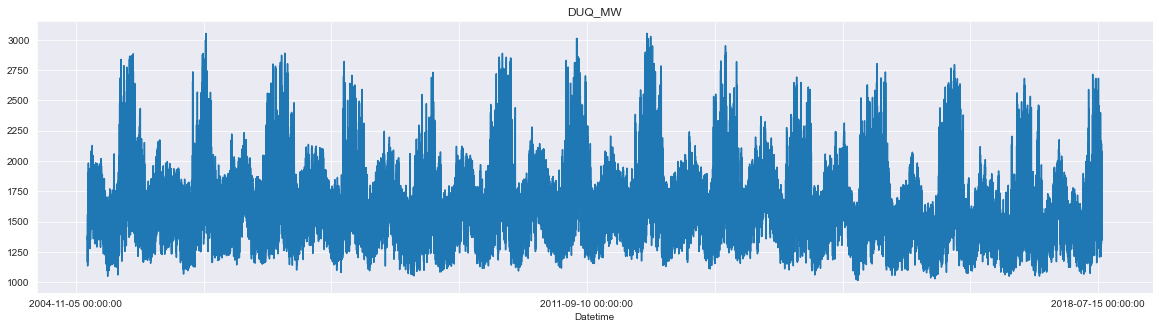

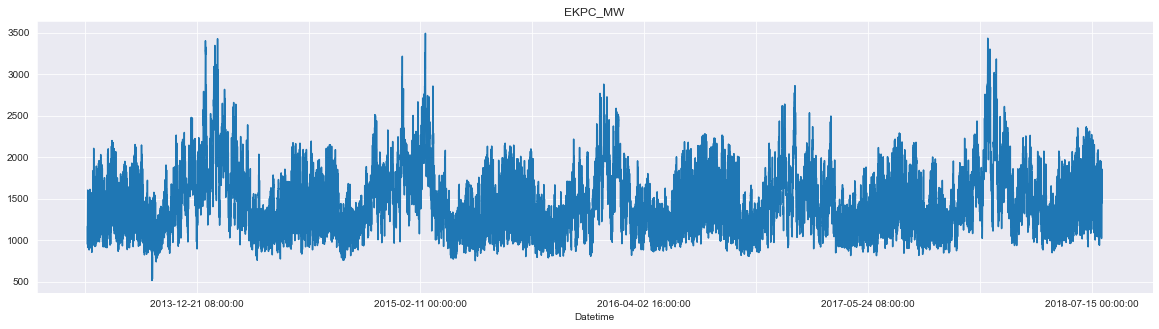

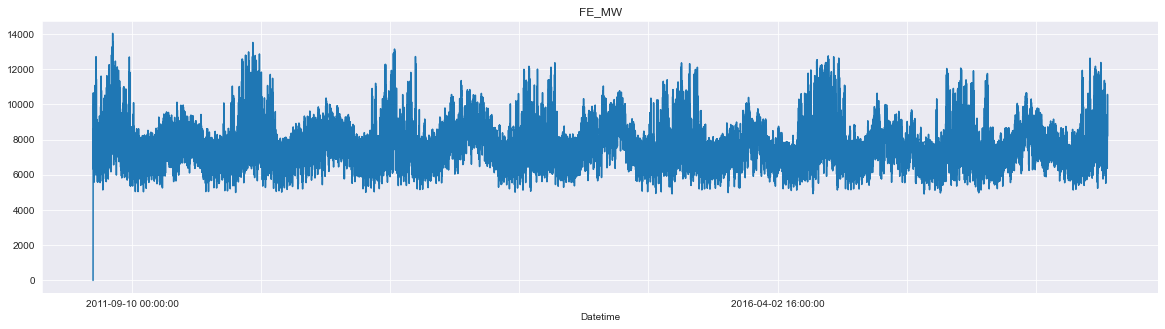

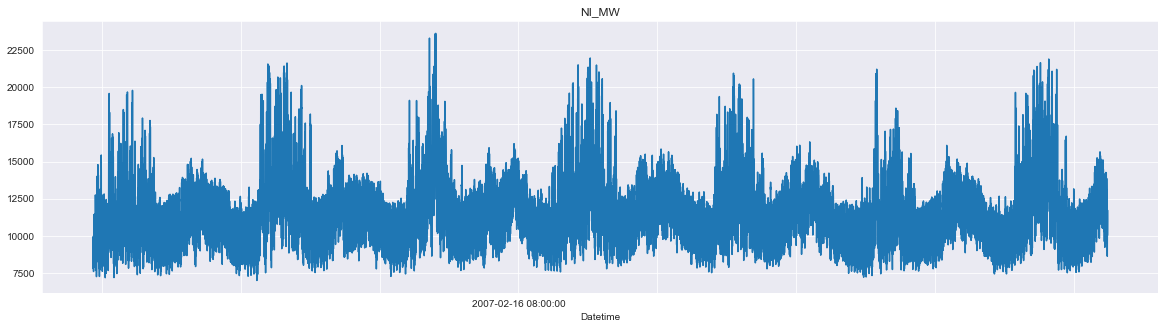

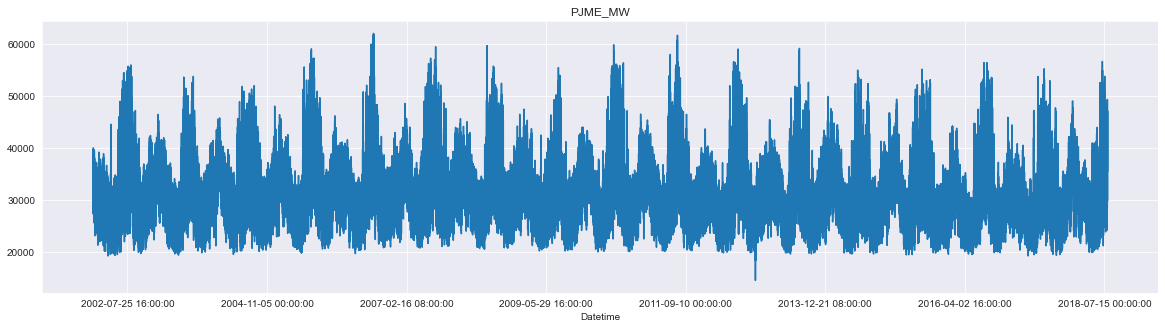

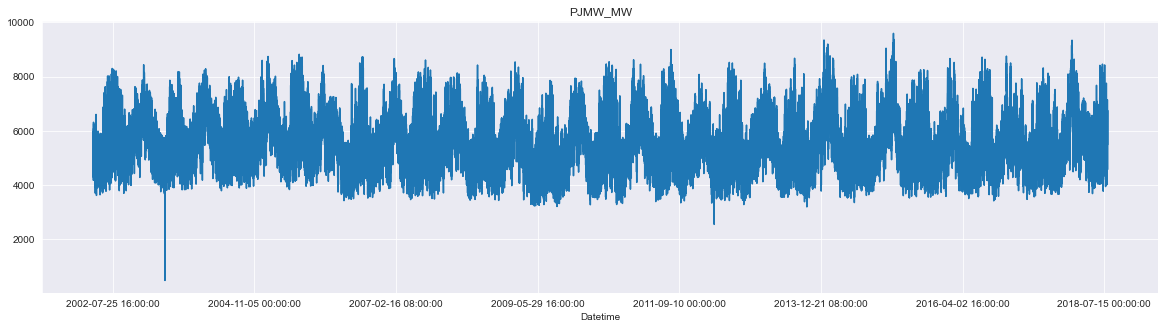

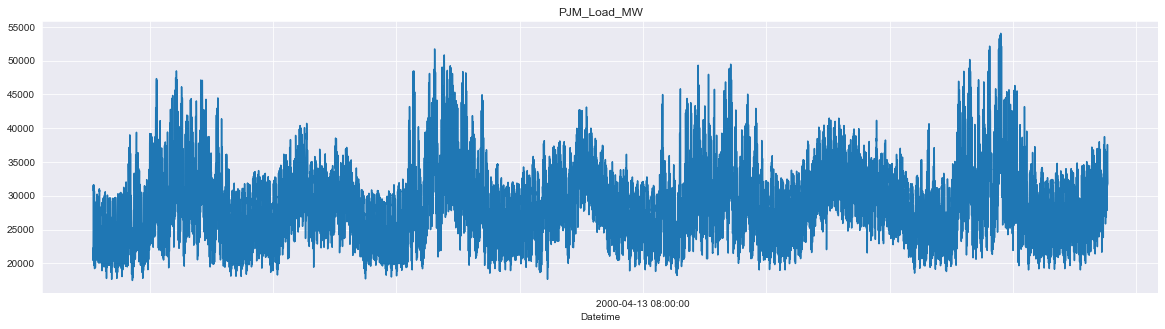

In [14]:
var=['AEP_MW', 'COMED_MW', 'DAYTON_MW', 'DEOK_MW', 'DOM_MW', 'DUQ_MW', 'EKPC_MW', 'FE_MW', 'NI_MW', 'PJME_MW', 'PJMW_MW', 'PJM_Load_MW']

for index, item in enumerate(var):
    plt.figure()
    first_axis = combo_temp[item].plot(title=item)
    first_axis.xaxis.set_major_locator(plt.MaxNLocator(10))
    plt.show

And the same for the row total.

<function matplotlib.pyplot.show(close=None, block=None)>

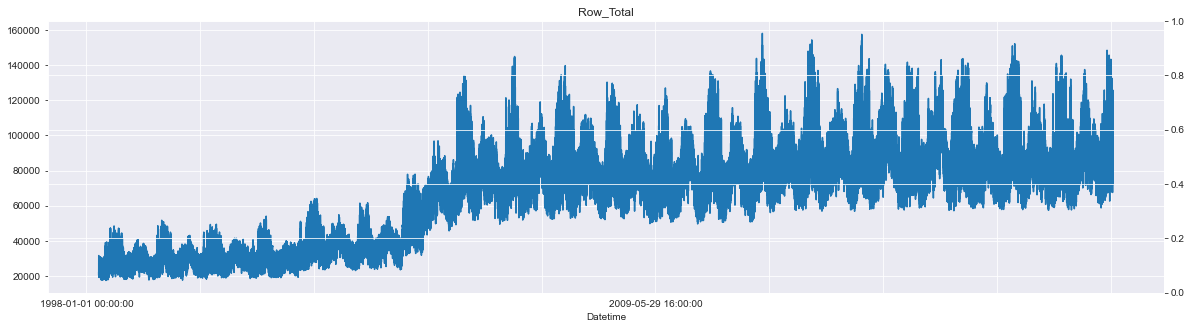

In [14]:
plt.figure()
first_axis = combo_temp['Row_Total'].plot(title='Row_Total')
first_axis.xaxis.set_major_locator(plt.MaxNLocator(10))
second_axis = first_axis.twinx()
plt.show

We can overlay the temperature data.

<function matplotlib.pyplot.show(close=None, block=None)>

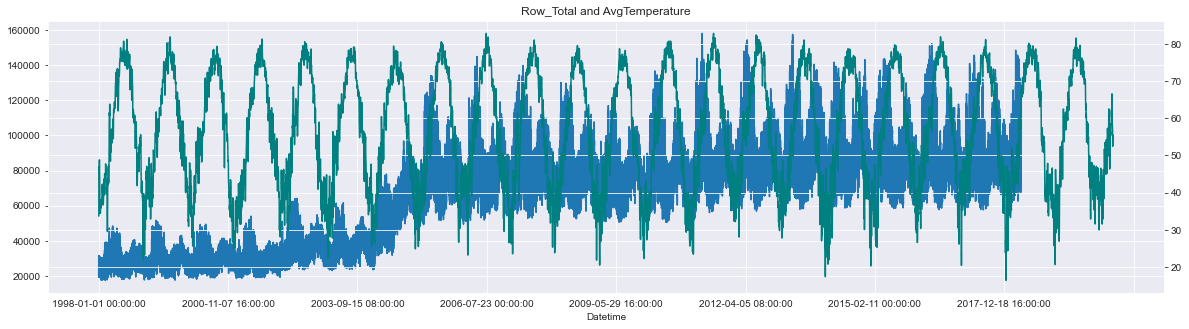

In [16]:
ytwo = 'AvgTemperature'
plt.figure()
first_axis = combo['Row_Total'].plot(title='Row_Total and AvgTemperature')
first_axis.xaxis.set_major_locator(plt.MaxNLocator(10))
second_axis = first_axis.twinx()
second_axis.plot(combo_temp[ytwo],color='teal')
second_axis.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.show

And we can narrow our timeframe to begin creating our seasonal model.

<AxesSubplot:label='4ecab3a0-d1ba-4204-bd6d-2a813312d438', xlabel='Datetime'>

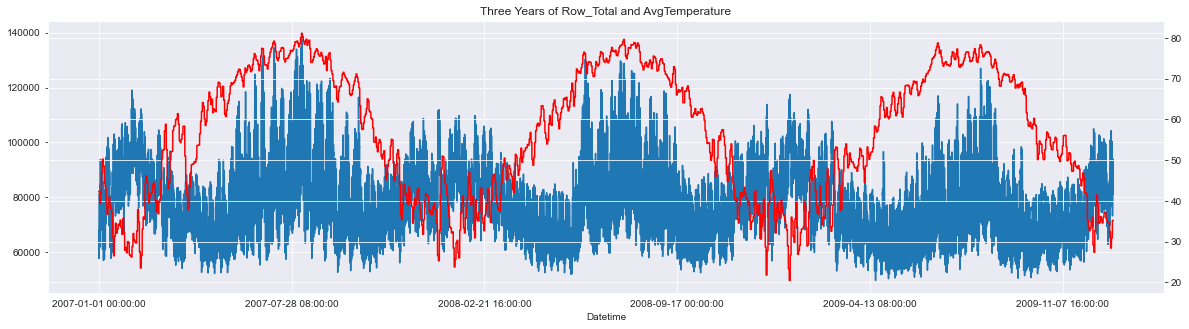

In [24]:
p1 = combo_temp.index > '2007-01-01'
p2 = combo_temp.index < '2010-01-01'
combo_three = combo_temp[np.logical_and.reduce([p1, p2])]

ax1 = combo_three['Row_Total'].plot(title='Three Years of Row_Total and AvgTemperature')
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
combo_three['AvgTemperature'].plot(ax=ax2, color='red')


In [25]:
combo_three_total = combo_three['Row_Total']
combo_three_total_df = combo_three_total.to_frame()
combo_three_total_df.index = pd.to_datetime(combo_three_total_df.index)
combo_three_temp = combo_three['AvgTemperature']

We can make use of Seasonal Autoregressive Integrated Moving Average to model this non-linear seasonal data. SARIMA takes in seasonality, trend, and noise from the above data and then creates a model. First we need to decide some parameters so that we can find the best seasonality, trend, and noise points. Unfortunately, my small computer is unable to run this due to memory.

First, we must find the most optimal AIC, which is the lowest AIC value.

In [26]:
import itertools
import statsmodels
import warnings
warnings.filterwarnings("ignore")

combo_three_total_noon = combo_three_total_df[combo_three_total_df.index.hour==12]

p=d=q = range(0,2)

pdq = list(itertools.product(p, d, q))
seasonalproduct = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

aic_list = []

for prod1 in pdq:
    for seasonalprod in seasonalproduct:
        model = statsmodels.tsa.statespace.sarimax.SARIMAX(combo_three_total_noon, order=prod1, 
                                                   seasonal_order = seasonalprod, enforce_stationarity=False, 
                                                      enforce_invertibility = False)
        results = model.fit()
        aic_list.append([prod1, seasonalprod, results.aic])


aic_min = 1000000
for item in aic_list:
    if item[2] < aic_min:
        aic_min = item[2]
        print('new min AIC value', item)
print(aic_min)

new min AIC value [(0, 0, 0), (0, 0, 0, 12), 28028.814761981732]
new min AIC value [(0, 0, 0), (0, 0, 1, 12), 26978.614863765266]
new min AIC value [(0, 0, 0), (0, 1, 0, 12), 23502.859207542042]
new min AIC value [(0, 0, 0), (0, 1, 1, 12), 23053.68204362074]
new min AIC value [(0, 0, 0), (1, 1, 1, 12), 23039.18177964967]
new min AIC value [(0, 0, 1), (0, 1, 0, 12), 22864.171959460924]
new min AIC value [(0, 0, 1), (0, 1, 1, 12), 22386.3376129352]
new min AIC value [(0, 1, 0), (0, 0, 1, 12), 22226.211966543808]
new min AIC value [(0, 1, 0), (1, 0, 1, 12), 22215.95804958934]
new min AIC value [(0, 1, 1), (0, 0, 1, 12), 22205.012760960497]
new min AIC value [(0, 1, 1), (1, 0, 1, 12), 22200.90868414849]
new min AIC value [(1, 1, 1), (0, 0, 1, 12), 22090.48605594269]
new min AIC value [(1, 1, 1), (1, 0, 1, 12), 22088.75074109663]
22088.75074109663


The lowest AIC value is found with the following paramters (1,1,1) and seasonal parameters (1,0,1,12).

 [(1, 1, 1), (1, 0, 1, 12), 22088.75074109663]

Now we can adjust our model with these parameters.

In [27]:
import statsmodels.api as api

model = api.tsa.statespace.SARIMAX(combo_three_total_noon, order = (1,1,1), 
                                   seasonal_order = (1,0,1,12), 
                                   enforce_stationarity = False, enforce_invertibility = False)

results = model.fit()

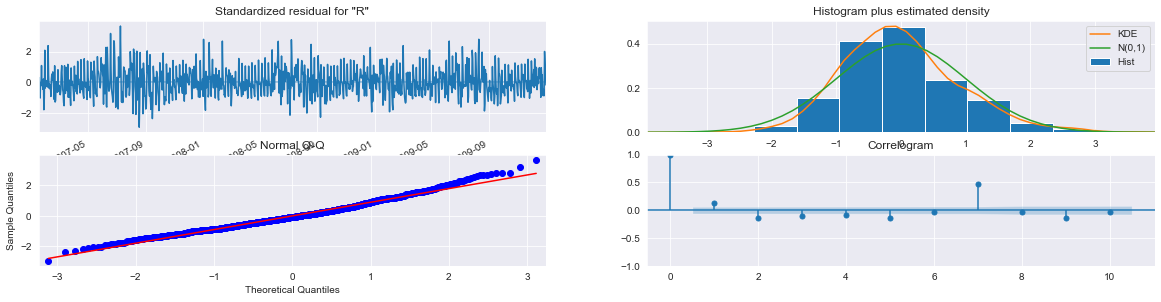

In [28]:
results.plot_diagnostics()
plt.show()

In [29]:
predict = results.get_prediction(start = pd.to_datetime('2007-10-01 12:00:00'), dynamic = False)
confidence = predict.conf_int()

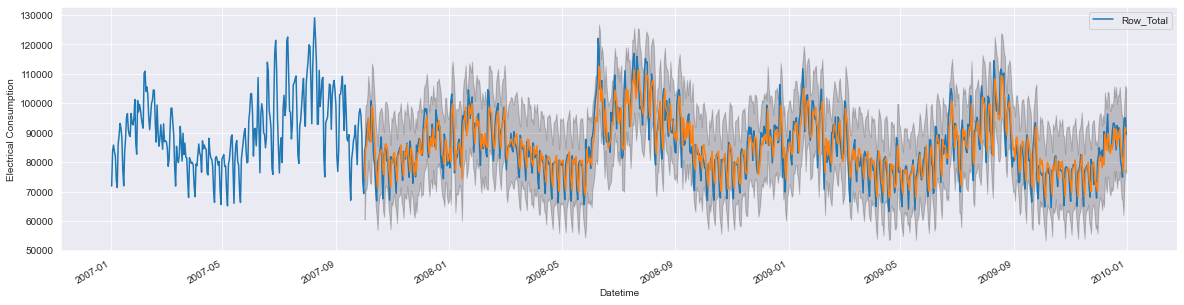

In [31]:
ax1 = combo_three_total_noon['2007-01-01 12:00:00':].plot(label='Observed Row_Total')
predict.predicted_mean.plot(ax=ax1, label='Forecast')

ax1.fill_between(confidence.index, confidence.iloc[:,0], confidence.iloc[:,1], color='k', alpha=.2)

ax1.set_xlabel("Datetime")
ax1.set_ylabel("Electrical Consumption")
plt.show()

Above we can see the true data and the model's predicted data are nearly overlayed. Our model is a success!